<a href="https://colab.research.google.com/github/gazabAnurag/TF_BETARUNS/blob/master/Preprocessing_Cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2 as cv
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
files.upload()

{}

In [0]:
img = cv.imread('./photo.jpg')

In [6]:
type(img)

numpy.ndarray

In [7]:
img.shape

(320, 244, 3)

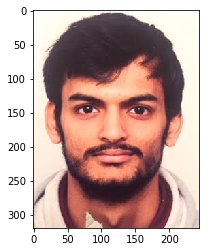

In [19]:
#img
'''
The image appears fucked up since OpenCV uses BGR instead of RGB
SO we need to change it
'''
plt.imshow(img)
#change the parsing mechanism 
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

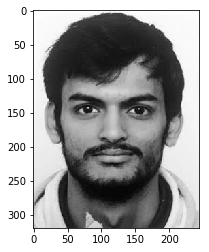

In [22]:
#convert to grayscale
#pass color map to plt function
img_grey = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img_grey, cmap='gray')

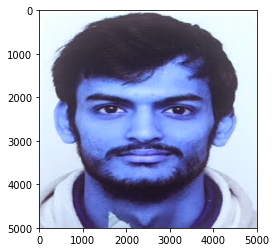

In [27]:
#resizing
#Flowers and animals might be ok with a little stretching or squeezing, but facial features may not.
IMAGE_HEIGHT = 5000
IMAGE_WIDTH = 5000
img_resized = cv.resize(img, (IMAGE_HEIGHT,IMAGE_WIDTH))

plt.imshow(img_resized)
'''
It is important and suggested to keep the original image size and ratio

'''

0.7625


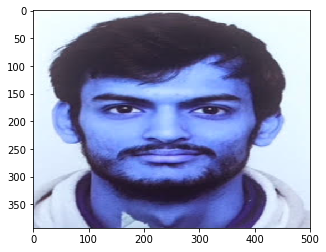

In [30]:
'''
Rescaling is assuming that you’re locking down the aspect ratio to prevent distortion in the image.
Landscape: limit resize by the height
Portrait: limit resize by the width
'''
HEIGHT = 500
WIDTH = 500
#get the aspect first
aspect = img.shape[1]/float(img.shape[0])
print(aspect)

if (aspect > 1):
  #landscape picture
  res = (aspect * 300)
  img_res = cv.resize(img, (res, HEIGHT))
elif (aspect < 1):
  #portrait picture
  res = int(300/aspect)
  img_res = cv.resize(img, (WIDTH, res))
else:
  img_res = cv.resize(img, (HEIGHT,WIDTH))
  
  
plt.imshow(img_res)

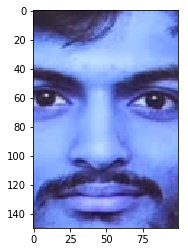

In [48]:
#cropping logic
'''
The best way to crop is from center. In order to locate this, divide the height and width by 2. Divide the crop mask size by 2 (this will be your starting point)
Crop the shit out of the image now
'''


def cropNow(img, cropx, cropy):
  starty = img.shape[0]//2-cropy//2
  startx = img.shape[1]//2-cropx//2
  return img[starty:starty+cropy, startx:startx+cropx]

plt.imshow(cropNow(img,100,150))

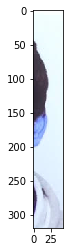

In [36]:
x//2-300//2

10

In [0]:
#clustering to get the image colors
'''
not really sure where to use this but meh!!
'''
from sklearn.cluster import KMeans
import cv2 as cv
import matplotlib.pyplot as plt
from collections import Counter

#convert the image into hex code to get a unique value for each colo
'''
Logic here is that we cluster the colors around their mean value and end
up with a propotion of the colors in the original images.
'''

def rgb2hex(rgb):
  #function to generate the hex code
  return "#{:02x}{:02x}{:02x}".format(int(rgb[0]),int(rgb[1]),int(rgb[2]))

def plotImage(path, k=10):
  #load and convert the parsing to RGB
  image_orig = cv.imread(path)
  image_color = cv.cvtColor(image_orig, cv.COLOR_BGR2RGB)
  
  #resize the image
  image = cv.resize(image_color, (64,64), interpolation = cv.INTER_AREA)
  
  #reshape the image as a series
  '''
  reshape it to contain the 3 colors in 3 columns and all the pixels in rows
  '''
  image = image.reshape((image.shape[0]*image.shape[1]),3)
  
  #build and classify
  cls = KMeans(n_clusters=k)
  label = cls.fit_predict(image)
  
  #count the labels
  '''
  Personally ich denke there can be better way to visualise centroid
  But mai apna dimag nhi lagauga yaha
  '''
  color_count = Counter(label)
  total_count = sum(color_count.values())
  
  #we first obtain the color for the centroid and then obtain the label
  #weird flex but oka!
  center_color = list(cls.cluster_centers_)
  normal_colors = [center_color[i]/255 for i in color_count.keys()]
  color_label = [rgb2hex(normal_colors[i]*255) for i in color_count.keys()]
  
  plt.figure(figsize=(16,8))
  plt.subplot(221)
  plt.imshow(image_color)
  plt.axis('off')
  
  plt.subplot(222)
  plt.pie(color_count.values(),labels = color_label, colors = normal_colors, startangle = 90)
  plt.axis('equal')
  plt.show()

In [75]:
from google.colab import files
files.upload()

Saving test3.jpg to test3.jpg


{'test3.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x16\x15\x15\x17\x17\x15\x18\x16\x18\x18\x17\x18\x15\x18\x18\x19\x18\x18\x17\x17\x18\x17\x17\x17\x18\x1d( \x18\x1a%\x1d\x15\x17!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-% %--------------------------------------------------\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x05\x02\x01\x06\x00\x07\xff\xc4\x004\x10\x00\x01\x03\x03\x02\x04\x04\x06\x02\x02\x02\x03\x01\x00\x00\x00\x01\x00\x02\x11\x03\x04!1A\x05\x12Qa"q\x81\x91\xa1\xb1\xc1\xd1\xe1\xf0\x132\x14\xf1BR\x15#\x82\x06\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x01\x05\x00\x06\xff\xc4\x002\x11\x00\x02\x02\x02\x02\x01\x04\x01\x02\x04\x06\x02\x03\x00\x00\x00\x01\x02\x00\x11\x03!\x121\x04\x13"AQa\x052\x14Bq\

In [58]:
!ls

'photo (1).jpg'   photo.jpg   sample_data   unnamed.jpg


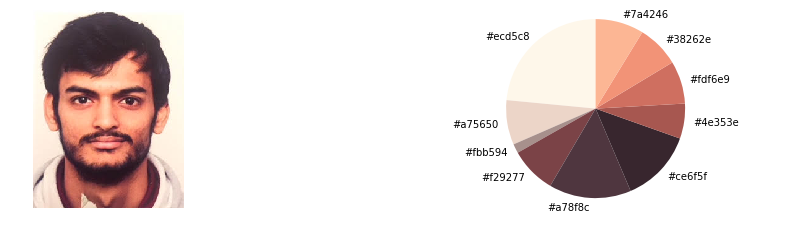

In [66]:
plotImage('./photo.jpg',10)

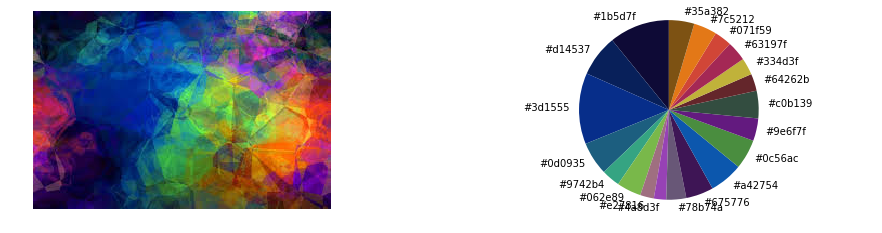

In [78]:
plotImage('./test3.jpg',20)